In [1]:
import sys
sys.path.append('..')

from sklearn.datasets import make_regression

import numpy as np
from src import grad_desc_algos as gda

import timeit

import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline

## Import dataset

In [2]:
features, target, coef = make_regression(n_samples=10000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=10.0,
                                         coef = True,
                                         random_state=1)

## Batch Gradient Descent

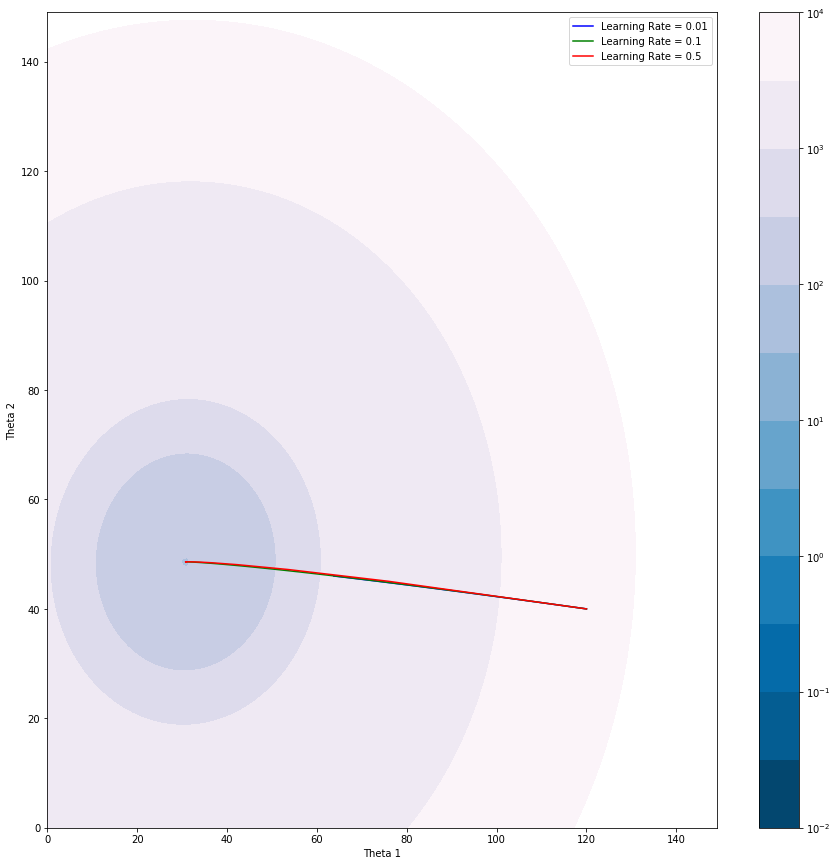

Final thetas: [30.81906981 48.58832618]
Actual Coefficents: [30.51944327 48.38204155]


In [3]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(15, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

epochs = 100

learing = [0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    #thetas, MSE = batch_gradient_descent(features, target, theta, lr, epochs)
    thetas, MSE = gda.batch_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

## Stochastic Gradient Descent

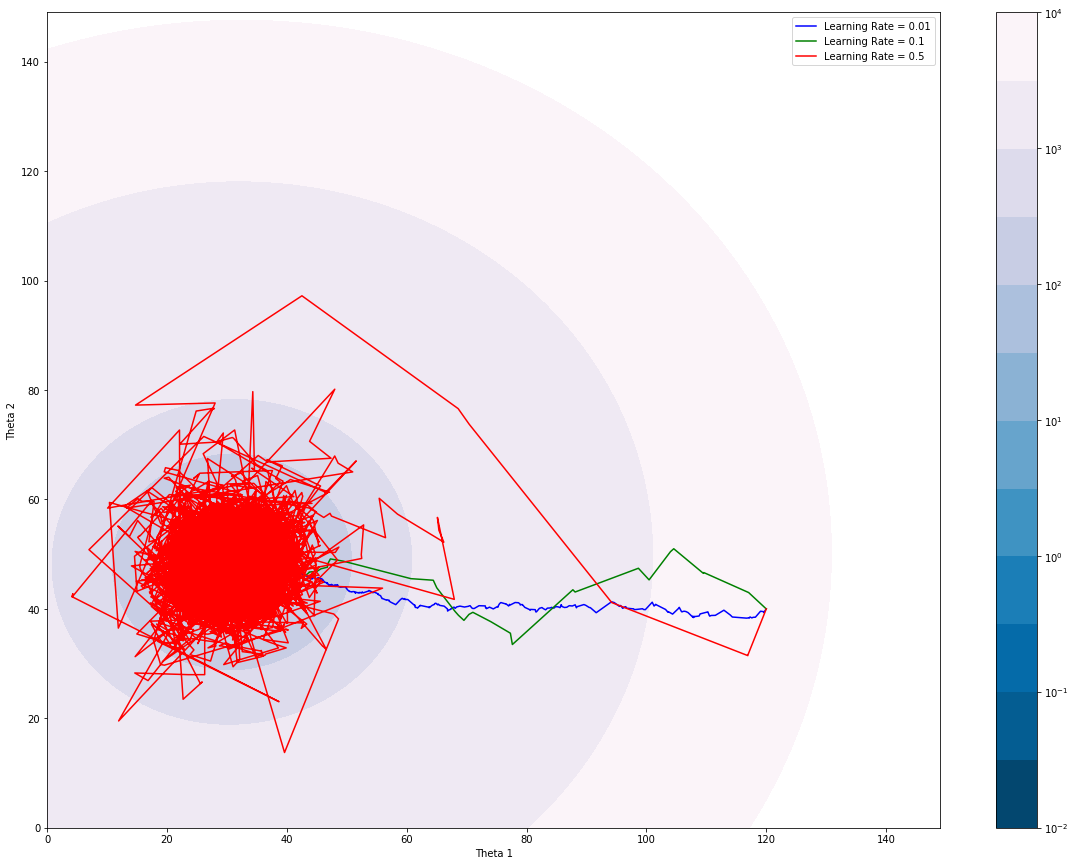

Final thetas: [32.86881993 51.78041512]
Actual Coefficents: [30.51944327 48.38204155]


In [111]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learing = [0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 100

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = gda.stochastic_gradient_descent(features, target, theta, lr, epochs)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

## Comparison of Gradient Descent implementations. 


| Algorithim | Batch Size  |
|-----|---|
| stochastic gradient descent | 1  | 
| mini-batch gradient descent | 32  |
| batch gradient descent | 10,000  |

Final thetas for batch size of 1: [33.9751792  45.90917263]
Final thetas for batch size of 32: [31.19255614 48.25026365]
Final thetas for batch size of 10000: [62.24172131 46.1848212 ]


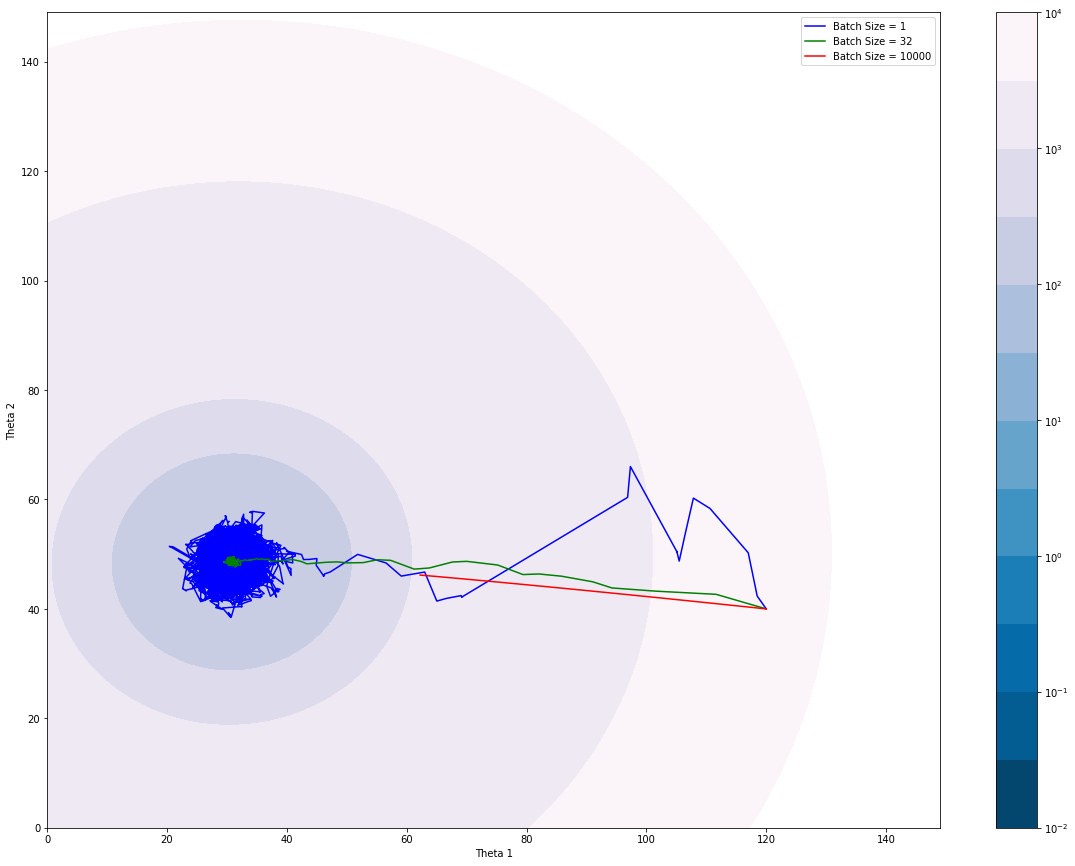

Final thetas: [62.24172131 46.1848212 ]
Actual Coefficents: [30.51944327 48.38204155]


In [10]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learning = 0.1 #[0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 10
batch_size = [1, 32, 10000]

for c, rs, bs in zip(colors, random_start, batch_size):
    theta = rs
    thetas, MSE = gda.minibatch_gradient_descent(features, target, theta, learning, epochs, bs)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Batch Size = {}'.format(bs))
    ax.legend()
    print("Final thetas for batch size of {}: {}".format(bs, thetas[-1]))
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))